In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h3>Prep X and Y variable</h3>

In [5]:
x = df.drop('math_score', axis=1)
y = df['math_score']

In [6]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
cont_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

In [9]:
cont_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", cont_transformer, cont_features)
    ]
) 

In [10]:
X = preprocessor.fit_transform(x)

In [11]:
print(X[0])
print()
print(X.shape)


[1.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         1.         0.         1.         0.19399858
 0.39149181]

(1000, 19)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

<h3>Evaluation function</h3>

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    
    return mae, mse, rmse, r2

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "SVR": SVR()}


In [16]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print(f"Model {i}: {list(models.keys())[i]}")
    print('model performance for training set')
    print(f"- r2 score: {model_train_r2}")
    print(f"- mean absolute error: {model_train_mae}")
    print(f"- mean squared error: {model_train_mse}")
    print(f"- root mean squared error: {model_train_rmse}")
    print('\n')
    print(f"Model {i}: {list(models.keys())[i]}")
    print('model performance for test set')
    print(f"- r2 score: {model_test_r2}")
    print(f"- mean absolute error: {model_test_mae}")
    print(f"- mean squared error: {model_test_mse}")
    print(f"- root mean squared error: {model_test_rmse}")
    print('--'*50)

Model 0: Linear Regression
model performance for training set
- r2 score: 0.8742556463650867
- mean absolute error: 4.267138671875
- mean squared error: 28.348748397827148
- root mean squared error: 5.324354270503339


Model 0: Linear Regression
model performance for test set
- r2 score: 0.8803449074540941
- mean absolute error: 4.2158203125
- mean squared error: 29.116678771972655
- root mean squared error: 5.3959872842671395
----------------------------------------------------------------------------------------------------
Model 1: Lasso Regression
model performance for training set
- r2 score: 0.8071462015863456
- mean absolute error: 5.206302661246526
- mean squared error: 43.47840400585579
- root mean squared error: 6.593815587795566


Model 1: Lasso Regression
model performance for test set
- r2 score: 0.8253197323627853
- mean absolute error: 5.157881810347763
- mean squared error: 42.5064168384116
- root mean squared error: 6.519694535667419
-----------------------------------

<h3>Result in Pandas Dataframe</h3>

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['model_name', 'r2_score']).sort_values(by='r2_score', ascending=False).reset_index(drop=True)

,model_name,r2_score
0,Ridge Regression,0.880593
1,Linear Regression,0.880345
2,CatBoosting Regressor,0.851632
3,Random Forest,0.847953
4,AdaBoost,0.841767
5,XGBRegressor,0.827797
6,Lasso Regression,0.825320
7,Decision Tree,0.734588
8,SVR,0.728600


In [18]:
## use linear regression since there is hardly any difference between the r2 scores between linear regression and ridge regression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print(f"Model performance for training set")
print(f"- r2 score: {model_train_r2}")
print(f"- mean absolute error: {model_train_mae}")
print(f"- mean squared error: {model_train_mse}")
print(f"- root mean squared error: {model_train_rmse}")
print('\n')
print(f"Model performance for test set")
print(f"- r2 score: {model_test_r2}")
print(f"- mean absolute error: {model_test_mae}")
print(f"- mean squared error: {model_test_mse}")
print(f"- root mean squared error: {model_test_rmse}")

Model performance for training set
- r2 score: 0.8742556463650867
- mean absolute error: 4.267138671875
- mean squared error: 28.348748397827148
- root mean squared error: 5.324354270503339


Model performance for test set
- r2 score: 0.8803449074540941
- mean absolute error: 4.2158203125
- mean squared error: 29.116678771972655
- root mean squared error: 5.3959872842671395


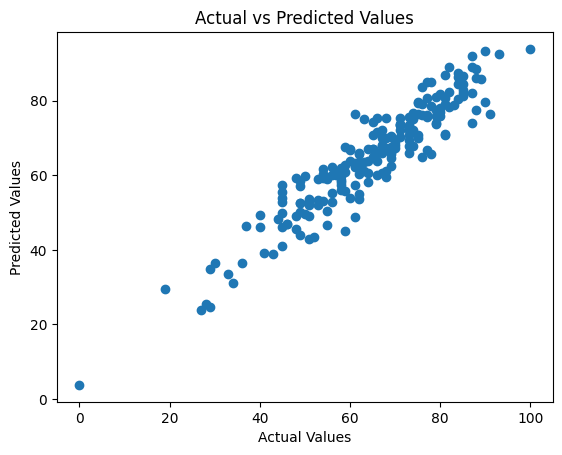

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## plot the actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

<Axes: xlabel='math_score'>

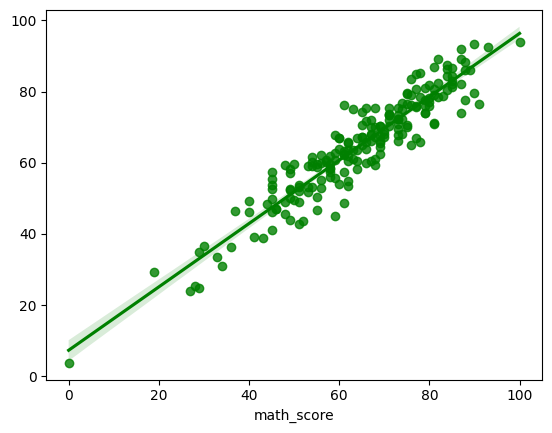

In [20]:
sns.regplot(x=y_test, y=y_test_pred, color='green')

**difference  between actual value and predicted value**

In [23]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Difference': abs(y_test - y_test_pred)}).reset_index(drop=True)

,Actual,Predicted,Difference
0,91,76.507812,14.492188
1,53,58.953125,5.953125
2,80,76.960938,3.039062
3,74,76.757812,2.757812
4,84,87.539062,3.539062
...,...,...,...
195,52,43.546875,8.453125
196,62,62.031250,0.031250
197,74,67.976562,6.023438
198,65,67.132812,2.132812
